<a href="https://colab.research.google.com/github/AneeshPK7/Responsible_A.I/blob/main/Resp_AI_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignmnet 2

**IMPORTING LIBRARIRES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler


**Loading The Dataset**


In [ ]:
df = pd.read_csv("Salary_dataset.csv")
df.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)


**Dataset Overview**

In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


**Feature–Target Split**

In [ ]:
X = df.iloc[:, :-1]   # Independent variable (YearsExperience)
y = df.iloc[:, -1]    # Dependent variable (Salary)


**70–30 Split with Shuffling**

In [ ]:
# Linear Regression with 5 Different Shuffles
mse_70_30 = []

for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=True, random_state=i
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_70_30.append(mse)

    print(f"Shuffle {i+1} - MSE: {mse}")


Shuffle 1 - MSE: 23370078.800832972
Shuffle 2 - MSE: 39139215.999588534
Shuffle 3 - MSE: 64406629.38525959
Shuffle 4 - MSE: 31330529.37370801
Shuffle 5 - MSE: 37067848.91251376


**Visualizing One Shuffle**

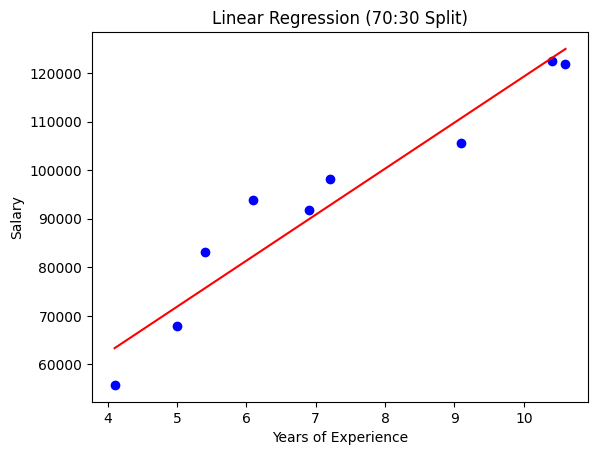

In [ ]:
plt.scatter(X_test['YearsExperience'], y_test, color='blue')
sorted_idx = np.argsort(X_test['YearsExperience'])
plt.plot(
    X_test['YearsExperience'].iloc[sorted_idx],
    y_pred[sorted_idx],
    color='red'
)

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression (70:30 Split)")
plt.show()

**Observation**:

Shuffling the dataset affects the composition of training and testing sets.
Since the dataset is small, different shuffles result in significantly
different Mean Squared Error values.


**80–20 Split & Normalization**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


**Train–Test Split (80–20)**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse_no_norm = mean_squared_error(y_test, y_pred)

print("MSE without Normalization:", mse_no_norm)


MSE without Normalization: 49830096.855908394


**Without Normalization**

In [ ]:
minmax = MinMaxScaler()

X_train_mm = minmax.fit_transform(X_train)
X_test_mm = minmax.transform(X_test)

model_mm = LinearRegression()
model_mm.fit(X_train_mm, y_train)

y_pred_mm = model_mm.predict(X_test_mm)
mse_minmax = mean_squared_error(y_test, y_pred_mm)

print("MSE with Min-Max Scaling:", mse_minmax)


MSE with Min-Max Scaling: 49830096.85590833


**Min-Max Normalization**

In [ ]:
standard = StandardScaler()

X_train_std = standard.fit_transform(X_train)
X_test_std = standard.transform(X_test)

model_std = LinearRegression()
model_std.fit(X_train_std, y_train)

y_pred_std = model_std.predict(X_test_std)
mse_std = mean_squared_error(y_test, y_pred_std)

print("MSE with Standardization:", mse_std)


MSE with Standardization: 49830096.85590836


**Standardization (Z-Score)**

In [ ]:
results = pd.DataFrame({
    "Method": ["No Normalization", "Min-Max Scaling", "Standard Scaling"],
    "MSE": [mse_no_norm, mse_minmax, mse_std]
})

results


,Method,MSE
0,No Normalization,4.983010e+07
1,Min-Max Scaling,4.983010e+07
2,Standard Scaling,4.983010e+07


**Conclusion**:
1. Normalization does not affect Linear Regression performance in this dataset.
2. Linear Regression using Ordinary Least Squares is scale-invariant.
3. Since only one feature exists, scaling does not change feature relationships.


• Shuffling impacts model performance significantly for small datasets.
• Normalization does not affect Linear Regression accuracy for single-feature data.
• Mean Squared Error is suitable for evaluating regression tasks.
